# **Final Project: Linear Regression and K-NN comparison**

---

Elad David (206760274) & Inbar Shmaya (208774026)

In [56]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn import metrics
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt 
from sklearn.pipeline import Pipeline

# Stop condition variable:
epsilon = 0.001  # 10 ^ -3

# **Initialize:** Load data file and initialize matrix X and vector y

In [57]:
drive.mount('/content/drive', force_remount=True)
data_path = "/content/drive/MyDrive/ML/final_ex/students-grades.csv"
df = pd.read_csv(data_path)

Mounted at /content/drive


In [58]:
df.corr()

,school,male,age,urban,family size - GT3,parents live together,Mother's edu.,Father's edu.,travel time (home to school),weekly study time,past classes failures,school support,family edu. support,private lessons,activities,nursery,want higher edu.,internet,romantic rel.,family rel.,free time,go out w/ friends,workday alcohol consumption,weekend alcohol consumption,health status,absences,first period grade,second period grade,final grade
school,1.000000,-0.012286,0.377610,-0.279797,-0.064866,0.045923,-0.133333,-0.079807,0.242308,-0.090681,0.059804,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
male,-0.012286,1.000000,-0.028606,-0.028504,-0.089862,0.023443,0.078228,0.034878,0.059722,-0.306268,0.044436,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,-0.037847,0.029598,-0.163658,-0.163438,0.070641,-0.004140,0.243665,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
urban,-0.279797,-0.028504,-0.146722,1.000000,-0.072472,-0.042572,0.138804,0.072178,-0.328096,-0.020912,-0.078578,0.024712,0.023903,0.052800,-0.051360,0.059589,0.042854,0.216842,0.005257,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
family size - GT3,-0.064866,-0.089862,-0.037847,-0.072472,1.000000,0.149612,0.043068,0.058879,-0.063493,0.073595,0.015769,0.028642,0.112893,0.013882,0.000113,-0.102088,0.005806,-0.000720,-0.034395,0.022776,-0.017695,-0.023064,-0.101521,-0.103425,0.028992,-0.035783,-0.071445,-0.081223,-0.081407
parents live together,0.045923,0.023443,0.029598,-0.042572,0.149612,1.000000,-0.123565,-0.088730,0.028265,0.024294,-0.003339,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Mother's edu.,-0.133333,0.078228,-0.163658,0.138804,0.043068,-0.123565,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Father's edu.,-0.079807,0.034878,-0.163438,0.072178,0.058879,-0.088730,0.623455,1.000000,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
travel time (home to school),0.242308,0.059722,0.070641,-0.328096,-0.063493,0.028265,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.009246,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
weekly study time,-0.090681,-0.306268,-0.004140,-0.020912,0.073595,0.024294,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.037763,0.145228,0.167220,0.089877,0.081325,0.175081,0.059422,0.053285,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820


# **Section A:** Normalize the data

In [59]:
def normalize(df):
  """
  Return normalized data
  """
  result = df.copy()
  for feature_name in df.columns:
      if feature_name == "final grade":
        break
      max_value = df[feature_name].max()
      min_value = df[feature_name].min()
      result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
  return result

df = normalize(df)






# **Section B:** Devide into train and test groups 

In [60]:
x = df[['school', 'male', 'age', 'urban', 'family size - GT3',
       'parents live together', "Mother's edu.", "Father's edu.",
       'travel time (home to school)', 'weekly study time',
       'past classes failures', 'school support', 'family edu. support',
       'private lessons', 'activities', 'nursery', 'want higher edu.',
       'internet', 'romantic rel.', 'family rel.', 'free time',
       'go out w/ friends', 'workday alcohol consumption',
       'weekend alcohol consumption', 'health status', 'absences',
       'first period grade', 'second period grade']]

y = df['final grade']
m = len(y) # num of samples
n = x.shape[1] 

# Separate the data into random groups: x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=101)

# **Section C:** Most important features- algorithms comparison

Greedy algorithm: find the most important features

In [61]:
def greedy_algorithm(x_train, y_train, x_test, y_test, k):
    f = []
    while len(f) < k:  # run until we have k features
        max_score = 0  # keeps the highest score
        feature_max_score = None  # keeps the feature with the highest score
        for i in range(n):  # for each feature
            if i in f:  # if we choose it already to f skip
                continue
            temp = f.copy()
            temp.append(i)
            object_lr = LinearRegression().fit(x_train.iloc[:, temp], y_train)
            y_test = y_test.astype('int')
            score = object_lr.score(x_test.iloc[:, temp], y_test)  # calculate score= = mean accuracy on the given test
            if max_score < score:  # if it's higher than max score update max score
                max_score = score
                feature_max_score = i
        f.append(feature_max_score)  # add the feature the got the highest score

    object_lr = LinearRegression().fit(x_train.iloc[:, f], y_train)
    prediction = object_lr.predict(x_test.iloc[:, f])
    return f, prediction

RFE algorithm: find the most important features

In [62]:
def rfe(x_train, x_test, y_train, k):  
  """
  Recursive Feature Elimination
  """
  # create the RFE model and select attributes
  rfe = RFE(LinearRegression(), n_features_to_select=k)
  rfe = rfe.fit(x_train, y_train)
  f = [] # features
  for i in range(len(rfe.support_)):
    if rfe.support_[i]:
      f.append(i)

  object_lr = LinearRegression().fit(x_train.iloc[:, f], y_train)
  prediction = object_lr.predict(x_test.iloc[:, f])  # predict with the two features we found
  return f, prediction

Highest Thetas algorithm: find the most important features

In [63]:
def highest_theta(x_train, x_test, y_train, k):
    object_lr = LinearRegression().fit(x_train, y_train)
    theta = object_lr.coef_  # get thetas
    theta = np.abs(theta)
    f = []
    for i in range(k):
        index = np.where(theta == np.max(theta))[0][0]  # get index of highest theta
        f.append(index)
        theta[index] = 0  # update it to minimum to get the second highest theta

    object_lr = LinearRegression().fit(x_train.iloc[:, f], y_train)
    prediction = object_lr.predict(x_test.iloc[:, f])  # predict with the two features we found
    return f, prediction

Find out what is the idial number of important features for each algorithm + Find the k most important features

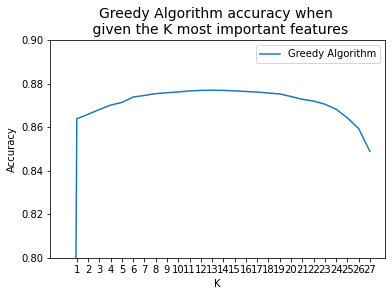

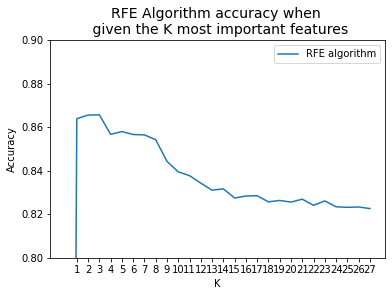

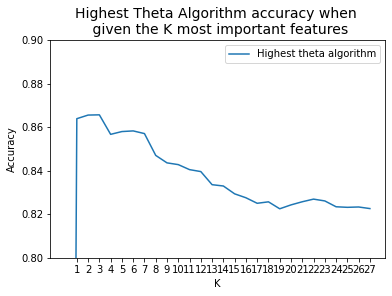



Greedy Algorithm: 
 There are 6 important features 
 features: [27, 19, 25, 14, 11, 26]

RFE Algorithm: 
 There are 2 important features 
 features: [25, 27]

Highest Theta Algorithm: 
 There are 2 important features  
 features: [27, 25]



In [64]:
def get_k(x_ts, y_ts, x_tr, y_tr):
    acc_greedy = [0]
    acc_rfe = [0]
    acc_highest_theta = [0]

    for i in range(1, n):
        f_greedy, y_pred_greedy = greedy_algorithm(x_tr, y_tr, x_ts, y_ts, i)
        acc_greedy.append(metrics.r2_score(y_ts, y_pred_greedy))
      
        f_rfe, y_pred_rfe = rfe(x_tr, x_ts, y_tr, i)
        acc_rfe.append(metrics.r2_score(y_ts, y_pred_rfe))

        f_highest_t, y_pred_higest_t = highest_theta(x_tr, x_ts, y_tr, i)
        acc_highest_theta.append(metrics.r2_score(y_ts, y_pred_higest_t))
   
    # draw greedy accuracy
    fig = plt.figure()
    plt.title("Greedy Algorithm accuracy when \n given the K most important features", size=14)
    plt.plot(acc_greedy, label="Greedy Algorithm")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.xticks(range(1, 28))
    plt.ylim([0.8, 0.9])
    plt.legend()
    plt.show()
    print("\n")

    # draw RFE accuracy
    fig = plt.figure()
    plt.title("RFE Algorithm accuracy when \n given the K most important features", size=14)
    plt.plot(acc_rfe, label="RFE algorithm")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.xticks(range(1, 28))
    plt.ylim([0.8, 0.9])
    plt.legend()
    plt.show()
    print("\n")

    # draw Highest Theta accuracy
    fig = plt.figure()
    plt.title("Highest Theta Algorithm accuracy when \n given the K most important features", size=14)
    plt.plot(acc_highest_theta, label="Highest theta algorithm")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.xticks(range(1, 28))
    plt.ylim([0.8, 0.9])
    plt.legend()
    plt.show()
    print("\n")


    k = []

    for i in range(len(acc_greedy)-1):
        if acc_greedy[i+1] - acc_greedy[i] < epsilon:
            k.append(i)
            break
    if len(k) == 0:
      k.append(len(acc_greedy)-1)

    for i in range(len(acc_rfe)-1):
        if acc_rfe[i+1] - acc_rfe[i] < epsilon:
            k.append(i)
            break
    if len(k) == 1:
      k.append(len(acc_rfe)-1)

    for i in range(len(acc_highest_theta)-1):
        if acc_highest_theta[i+1] - acc_highest_theta[i] < epsilon:
            k.append(i)
            break
    if len(k) == 2:
      k.append(len(acc_highest_theta)-1)
    
    return k

# Get k
k = get_k(x_test, y_test, x_train, y_train)

# Get most important features
f_greedy, y_pred_greedy = greedy_algorithm(x_train, y_train, x_test, y_test, k[0])
print("Greedy Algorithm: \n There are {} important features".format(k[0]), "\n features: {}\n".format(f_greedy))

f_rfe, y_pred_rfe = rfe(x_train, x_test, y_train, k[1])
print("RFE Algorithm: \n There are {} important features".format(k[1]), "\n features: {}\n".format(f_rfe))

f_highest_t, y_pred_higest_t = highest_theta(x_train, x_test, y_train, k[2])
print("Highest Theta Algorithm: \n There are {} important features".format(k[2]), " \n features: {}\n".format(f_highest_t))

## **Section E:** Interesting correlation information from the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


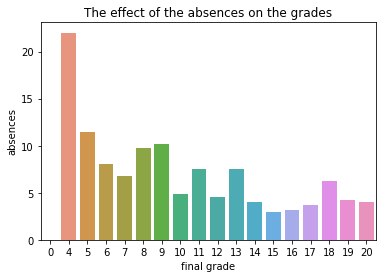

In [65]:
# We could observe that as absences decreases, the Grade mark increases.
# So the students who are absent for most of the classes will get their grade low.
data = pd.read_csv(data_path)
sns.barplot(data['final grade'], data['absences'], errwidth=0).set(title='The effect of the absences on the grades')
plt.show()

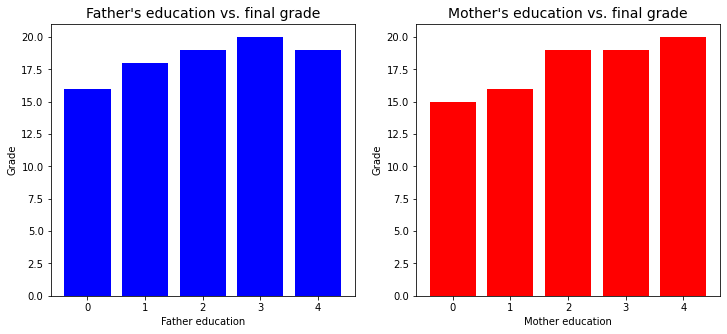

In [66]:
"""
From this we could see that Father's education does not affects student's 
grade but for the mothers who are educated their student's grade level got increased
.It is because mothers teach their children.May be...
"""
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(data["Father's edu."], data['final grade'], color='blue')
ax1.set_xlabel('Father education')
ax1.set_ylabel('Grade')
ax1.set_title("Father's education vs. final grade", size=14)

ax2.bar(data["Mother's edu."], data['final grade'], color='red')
ax2.set_xlabel('Mother education')
ax2.set_ylabel('Grade')
ax2.set_title("Mother's education vs. final grade", size=14)

for txt in fig.texts:
    txt.set_visible(False)

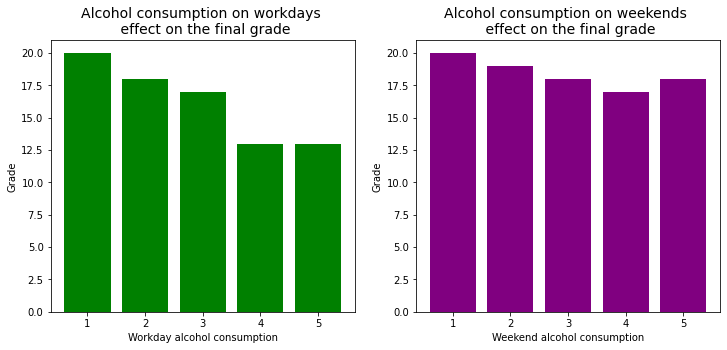

In [67]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))

ax1.bar(data['workday alcohol consumption'],data['final grade'],color='green')
ax1.set_xlabel('Workday alcohol consumption') #(numeric: from 1 - very low to 5 - very high)
ax1.set_ylabel('Grade')
ax1.set_title("Alcohol consumption on workdays \n effect on the final grade", size=14)

ax2.bar(data['weekend alcohol consumption'], data['final grade'],color='purple')
ax2.set_xlabel('Weekend alcohol consumption') #(numeric: from 1 - very low to 5 - very high)
ax2.set_ylabel('Grade')
ax2.set_title("Alcohol consumption on weekends \n effect on the final grade", size=14)

for txt in fig.texts:
    txt.set_visible(False)

# **Section D:** Correcting the data according to the most important features

Update the x matrix according to the ideal number of the most important features:

There are 2 features that had been chosen repeatedly for each of the algoithms above. These features are:

"absences" and "second period grade" (25, 27 Respectively)

In [68]:
new_x = df[['absences', 'second period grade']]
y = df['final grade']
n = new_x.shape[1]

# Separate the data into random groups: x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.33,random_state=101)

# **Section E:** K-NN algorithm and Linear Regression comparison

RMSE value for k =  1 is: 2.24458636254685
RMSE value for k =  2 is: 1.5352101579287551
RMSE value for k =  3 is: 1.4279412156499978
RMSE value for k =  4 is: 1.3533602511769174
RMSE value for k =  5 is: 1.3630903371294114
RMSE value for k =  6 is: 1.3762957500182276
RMSE value for k =  7 is: 1.4368354211316623
RMSE value for k =  8 is: 1.5832872967728053
RMSE value for k =  9 is: 1.5418638932749473
RMSE value for k =  10 is: 1.5434174433963588
RMSE value for k =  11 is: 1.602313638548283
RMSE value for k =  12 is: 1.6193833578592869
RMSE value for k =  13 is: 1.6467606895900442
RMSE value for k =  14 is: 1.6360510479886818
RMSE value for k =  15 is: 1.6762270327463353
RMSE value for k =  16 is: 1.655802096284779
RMSE value for k =  17 is: 1.649886917052416
RMSE value for k =  18 is: 1.6618179398864465
RMSE value for k =  19 is: 1.6649028891594104


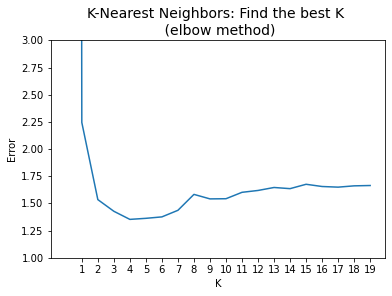



RMSE value for k =  4 is: 1.3533602511769174


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


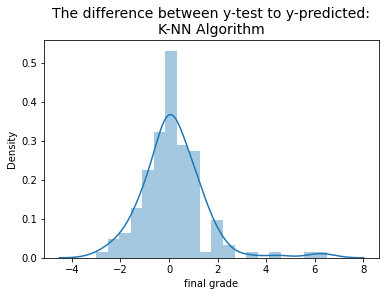


Accuracy of training dataset:  0.8641168271214636
Accuracy of test dataset:      0.898125948025514
Mean squared error: 1.83


In [69]:
def knn():
  rmse_val = [] # to store rmse values for different k
  rmse_val.append(100)
  for K in range(1, 20):
      # K = K+1
      model = KNeighborsRegressor(n_neighbors = K)

      model.fit(x_train, y_train)  #fit the model
      y_pred_knn=model.predict(x_test) #make prediction on test set
      error = sqrt(mean_squared_error(y_test, y_pred_knn)) #calculate rmse
      rmse_val.append(error) #store rmse values
      print('RMSE value for k = ' , K , 'is:', error)

  # draw Highest Theta accuracy
  fig = plt.figure()
  plt.title("K-Nearest Neighbors: Find the best K \n (elbow method)", size=14)
  plt.plot(rmse_val)
  plt.xlabel("K")
  plt.ylabel("Error")
  plt.xticks(range(1, 20))
  plt.ylim([1, 3])
  plt.show()
  print("\n")

  # Chosen K
  K = 4

  model = KNeighborsRegressor(n_neighbors = K)
  model.fit(x_train, y_train)  # fit the model
  y_pred_knn = model.predict(x_test) # make prediction on test set
  error = sqrt(mean_squared_error(y_test, y_pred_knn)) # calculate rmse
  print('RMSE value for k = ' , K , 'is:', error)
  sns.distplot(y_test-y_pred_knn)
  plt.title('The difference between y-test to y-predicted:\nK-NN Algorithm', size=14) 
  for txt in fig.texts:
      txt.set_visible(False)
  plt.show()

  print("\nAccuracy of training dataset: ", model.score(x_train, y_train))
  print("Accuracy of test dataset:     ", model.score(x_test, y_test))
  print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_knn)) # The mean squared error

  return y_pred_knn

y_pred_knn = knn()


Coefficients: 
 [ 2.95777388 20.76222569]

Accuracy of training dataset:  0.8021289650444712
Accuracy of test dataset:      0.865639852454235
Mean squared error: 2.42



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


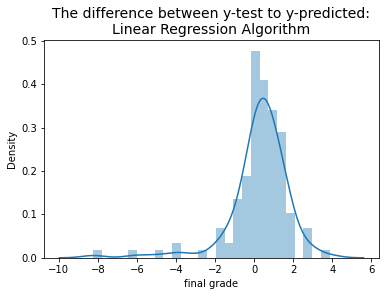

,Features,Theta
0,absences,2.957774
1,second period grade,20.762226


In [70]:
def linearRegression():
  linear_regressor = LinearRegression()  # Create linear regression object
  linear_regressor.fit(x_train, y_train) # Train the model using the training sets
  y_pred_lr = linear_regressor.predict(x_test)    # Make predictions using the testing set
  print('\nCoefficients: \n', linear_regressor.coef_) # The coefficients

  print("\nAccuracy of training dataset: ", linear_regressor.score(x_train, y_train))
  print("Accuracy of test dataset:     ", linear_regressor.score(x_test, y_test))
  print('Mean squared error: %.2f\n' % mean_squared_error(y_test, y_pred_lr)) # The mean squared error

  sns.distplot(y_test - y_pred_lr)
  plt.title('The difference between y-test to y-predicted:\nLinear Regression Algorithm', size=14) 
  for txt in fig.texts:
      txt.set_visible(False)
  plt.show()



  return y_pred_lr

# Add a coef table:
y_pred_lr = linearRegression()
linear_regressor = LinearRegression()  # Create linear regression object
linear_regressor.fit(x_train, y_train) # Train the model using the training sets
linear_regressor_summary = pd.DataFrame(new_x.columns.values, columns=['Features'])
linear_regressor_summary['Theta'] = linear_regressor.coef_
linear_regressor_summary

# **Section F:** Analyse accuracy and run-time

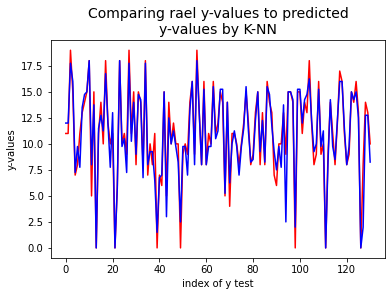

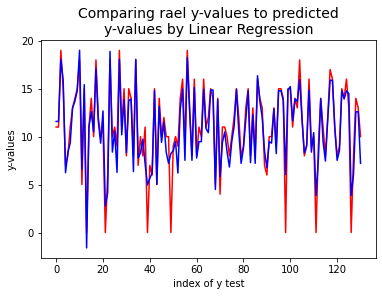

In [71]:
fig = plt.figure()
plt.title("Comparing rael y-values to predicted\ny-values by K-NN", size=14)
plt.plot(range(y_test.shape[0]), y_test, color='r', label="Test")
plt.plot(range(len(y_pred_knn)), y_pred_knn, color='b', label="K-NN")
plt.ylabel("y-values")
plt.xlabel("index of y test")
plt.show()
print("\n")

fig = plt.figure()
plt.title("Comparing rael y-values to predicted\ny-values by Linear Regression", size=14)
plt.plot(range(y_test.shape[0]), y_test, color='r', label="Test")
plt.plot(range(len(y_pred_lr)), y_pred_lr, color='b', label="LR")
plt.ylabel("y-values")
plt.xlabel("index of y test")
plt.show()

RMSE value for k =  1 is: 2.24458636254685
RMSE value for k =  2 is: 1.5352101579287551
RMSE value for k =  3 is: 1.4279412156499978
RMSE value for k =  4 is: 1.3533602511769174
RMSE value for k =  5 is: 1.3630903371294114
RMSE value for k =  6 is: 1.3762957500182276
RMSE value for k =  7 is: 1.4368354211316623
RMSE value for k =  8 is: 1.5832872967728053
RMSE value for k =  9 is: 1.5418638932749473
RMSE value for k =  10 is: 1.5434174433963588
RMSE value for k =  11 is: 1.602313638548283
RMSE value for k =  12 is: 1.6193833578592869
RMSE value for k =  13 is: 1.6467606895900442
RMSE value for k =  14 is: 1.6360510479886818
RMSE value for k =  15 is: 1.6762270327463353
RMSE value for k =  16 is: 1.655802096284779
RMSE value for k =  17 is: 1.649886917052416
RMSE value for k =  18 is: 1.6618179398864465
RMSE value for k =  19 is: 1.6649028891594104


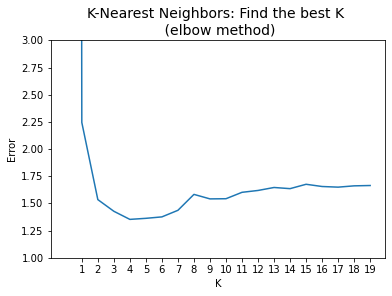



RMSE value for k =  4 is: 1.3533602511769174


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


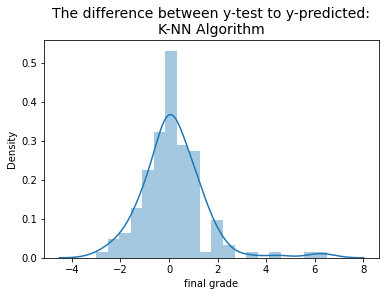


Accuracy of training dataset:  0.8641168271214636
Accuracy of test dataset:      0.898125948025514
Mean squared error: 1.83

Coefficients: 
 [ 2.95777388 20.76222569]

Accuracy of training dataset:  0.8021289650444712
Accuracy of test dataset:      0.865639852454235
Mean squared error: 2.42



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


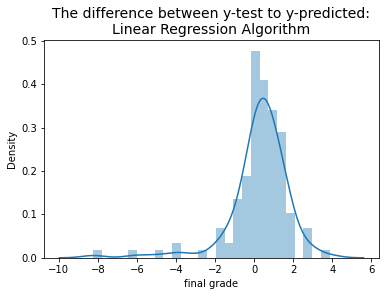


K-Nearest Neighbors algorithm took 0.528821 seconds
Linear Regression algorithm took 0.266513 seconds


In [72]:
def time_function(f, *args):
  """
  Call a function f with args and return the time (in seconds) that it took to execute.
  """
  tic = time.time()
  f(*args)
  toc = time.time()
  return toc - tic

s_time = time_function(knn,)
m_b_time = time_function(linearRegression,)

print('\nK-Nearest Neighbors algorithm took %f seconds' % s_time)
print('Linear Regression algorithm took %f seconds' % m_b_time)

# **Section G:** Overfitting calculation

>1, train: 0.706, test: 0.720
>2, train: 0.877, test: 0.869
>3, train: 0.873, test: 0.887
>4, train: 0.864, test: 0.898
>5, train: 0.875, test: 0.897
>6, train: 0.875, test: 0.895
>7, train: 0.873, test: 0.885
>8, train: 0.866, test: 0.861
>9, train: 0.866, test: 0.868
>10, train: 0.862, test: 0.868
>11, train: 0.859, test: 0.857
>12, train: 0.859, test: 0.854
>13, train: 0.852, test: 0.849
>14, train: 0.854, test: 0.851
>15, train: 0.852, test: 0.844
>16, train: 0.851, test: 0.848
>17, train: 0.848, test: 0.849
>18, train: 0.848, test: 0.846
>19, train: 0.846, test: 0.846
>20, train: 0.846, test: 0.845
>21, train: 0.840, test: 0.837
>22, train: 0.843, test: 0.833
>23, train: 0.841, test: 0.838
>24, train: 0.840, test: 0.833
>25, train: 0.836, test: 0.827
>26, train: 0.837, test: 0.828
>27, train: 0.835, test: 0.827
>28, train: 0.832, test: 0.825
>29, train: 0.831, test: 0.823


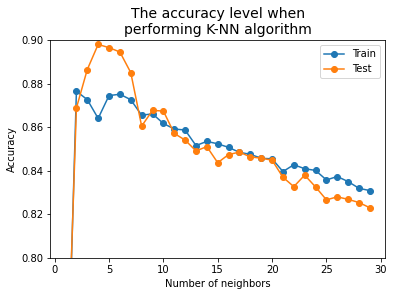

In [73]:
train_scores, test_scores = list(), list() # define lists to collect scores
values = [i for i in range(1, 30)] # define the tree depths to evaluate
for i in values:  # evaluate a decision tree for each depth
	# configure the model
	model = KNeighborsRegressor(n_neighbors=i)
	# fit model on the training dataset
	model.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train)
	train_acc = metrics.r2_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test)
	test_acc = metrics.r2_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.title("The accuracy level when\nperforming K-NN algorithm", size=14)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.ylim([0.8, 0.9])
plt.legend()
plt.show()

In [74]:
linear_regressor = LinearRegression()  # Create linear regression object
linear_regressor.fit(x_train, y_train) # Train the model using the training sets
y_pred_lr = linear_regressor.predict(x_test)    # Make predictions using the testing set
y_train_pred_lr = linear_regressor.predict(x_train)    # Make predictions using the train set

acc_train = linear_regressor.score(x_train, y_train)
acc_test = linear_regressor.score(x_test, y_test)
print("\nAccuracy of training dataset: ", acc_train)
print("Accuracy of test dataset:     ", acc_test)
print('Difference: ', acc_test - acc_train) 


Accuracy of training dataset:  0.8021289650444712
Accuracy of test dataset:      0.865639852454235
Difference:  0.06351088740976385
